<a href="https://colab.research.google.com/github/VinayChaudhari1996/SwingProfit/blob/main/Bollinger_%2B_RSI%2C_Double_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-03  3744.000000  3829.000000  3743.949951  3818.149902  3686.580078   
2022-01-04  3829.050049  3888.000000  3810.000000  3882.699951  3748.905762   
2022-01-05  3865.000000  3870.100098  3811.000000  3861.050049  3728.001953   
2022-01-06  3816.000000  3834.750000  3771.350098  3806.850098  3675.669678   
2022-01-07  3809.100098  3864.449951  3796.000000  3854.850098  3722.015625   

            Volume  
Date                
2022-01-03   67010  
2022-01-04  342652  
2022-01-05   54550  
2022-01-06  111898  
2022-01-07   41904  


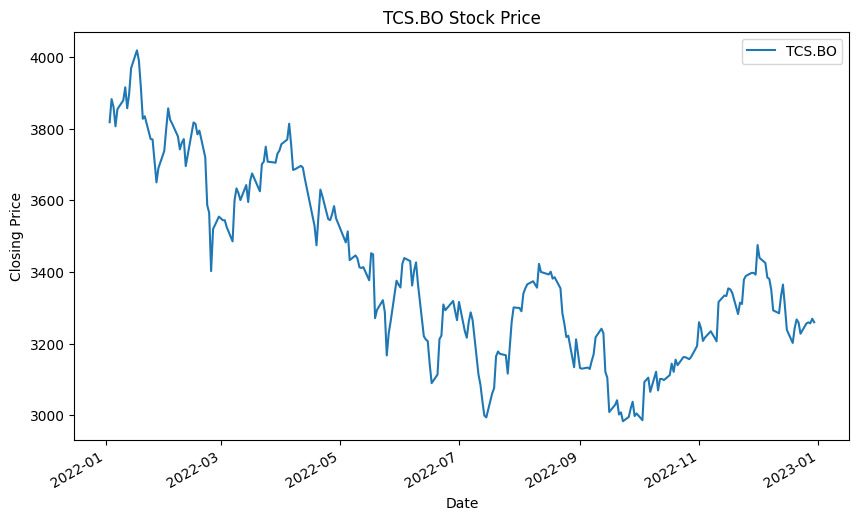

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Specify the stock symbol (e.g., TCS.BO for Tata Consultancy Services)
stock_symbol = "TCS.BO"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2023-01-01"

# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the fetched data
print(stock_data.head())

# Plot the closing prices
stock_data['Close'].plot(figsize=(10, 6), label=stock_symbol)
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Download historical stock data
symbol = 'TCS.BO'  # Replace with the desired stock symbol
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate RSI and Bollinger Bands
data['RSI'] = calculate_rsi(data, window=6)
data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

# Identify buy and sell signals
data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

# Plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=data[data['Buy_Signal']].index, y=data[data['Buy_Signal']]['Close'],
                         mode='markers', marker=dict(color='green'), name='Buy Signal'))
fig.add_trace(go.Scatter(x=data[data['Sell_Signal']].index, y=data[data['Sell_Signal']]['Close'],
                         mode='markers', marker=dict(color='red'), name='Sell Signal'))

fig.add_trace(go.Scatter(x=data.index, y=data['BB_Upper'], line=dict(color='black'), name='Bollinger Bands Upper'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_Lower'], line=dict(color='black'), name='Bollinger Bands Lower'))

# Add a range slider with animation
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig.show()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital / data['Close'][i]
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price))

        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price))

    return capital, trades

# Download historical stock data
symbol = 'TCS.BO'  # Replace with the desired stock symbol
data = yf.download(symbol, start='2022-01-01', end='2023-01-01' )

# Calculate RSI and Bollinger Bands
data['RSI'] = calculate_rsi(data, window=6)
data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

# Identify buy and sell signals
data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

# Simulate the trading strategy
final_capital, trades = simulate_strategy(data)

# Print results
print(f"Initial Capital: 50,000 INR")
print(f"Final Capital: {final_capital:.2f} INR")
print(f"Profit/Loss: {final_capital - 50000:.2f} INR")

# Plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=data[data['Buy_Signal']].index, y=data[data['Buy_Signal']]['Close'],
                         mode='markers', marker=dict(color='green'), name='Buy Signal'))
fig.add_trace(go.Scatter(x=data[data['Sell_Signal']].index, y=data[data['Sell_Signal']]['Close'],
                         mode='markers', marker=dict(color='red'), name='Sell Signal'))

fig.add_trace(go.Scatter(x=data.index, y=data['BB_Upper'], line=dict(color='black'), name='Bollinger Bands Upper'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_Lower'], line=dict(color='black'), name='Bollinger Bands Lower'))

# Display trade events
for trade_type, trade_date, trade_price in trades:
    if trade_type == 'Buy':
        fig.add_trace(go.Scatter(x=[trade_date], y=[trade_price], mode='markers', marker=dict(color='blue'),
                                 text=f'Buy at {trade_price}', name='Buy Event'))
    elif trade_type == 'Sell':
        fig.add_trace(go.Scatter(x=[trade_date], y=[trade_price], mode='markers', marker=dict(color='orange'),
                                 text=f'Sell at {trade_price}', name='Sell Event'))

fig.show()


[*********************100%%**********************]  1 of 1 completed
Initial Capital: 50,000 INR
Final Capital: 54437.87 INR
Profit/Loss: 4437.87 INR


In [ ]:
import yfinance as yf
import pandas as pd
import math

# Download historical stock data with 15-minute interval for the last 60 days
symbol = 'TCS.BO'  # Replace with the desired stock symbol
data = yf.download(symbol, period='5d', interval='30m')

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position))
        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price, position))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price, position))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity'])

# Calculate RSI and Bollinger Bands
data['RSI'] = calculate_rsi(data, window=6)
data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

# Identify buy and sell signals
data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

# Simulate the trading strategy
final_capital, trades_df = simulate_strategy(data)

# Print results
print(f"Initial Capital: 50,000 INR")
print(f"Final Capital: {final_capital:.2f} INR")
print(f"Profit/Loss: {final_capital - 50000:.2f} INR")

# Display the DataFrame with buy and sell information
print("\nTrade Details:")
trades_df


[*********************100%%**********************]  1 of 1 completed
Initial Capital: 50,000 INR
Final Capital: 48541.50 INR
Profit/Loss: -1458.50 INR

Trade Details:


,Action,Timestamp,Price,Quantity
0,Buy,2023-11-22 09:30:00,3506.000000,14.0
1,Buy,2023-11-24 09:30:00,3489.699951,14.0
2,Buy,2023-11-24 10:00:00,3497.100098,14.0
3,Buy,2023-11-24 10:30:00,3484.899902,14.0
4,Buy,2023-11-24 11:00:00,3482.100098,14.0
5,Buy,2023-11-24 11:30:00,3477.550049,14.0
6,Buy,2023-11-24 12:00:00,3476.000000,14.0
7,Buy,2023-11-24 12:30:00,3475.949951,14.0
8,Buy,2023-11-24 13:00:00,3474.149902,14.0
9,Buy,2023-11-24 13:30:00,3466.949951,14.0


In [46]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital / data['Close'][i]
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price))

        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price))

    return capital, trades

# Download historical stock data
symbol = 'TCS.BO'  # Replace with the desired stock symbol
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate RSI and Bollinger Bands
data['RSI'] = calculate_rsi(data, window=6)
data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

# Identify buy and sell signals
data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

# Simulate the trading strategy
final_capital, trades = simulate_strategy(data)

# Print results
print(f"Initial Capital: 50,000 INR")
print(f"Final Capital: {final_capital:.2f} INR")
print(f"Profit/Loss: {final_capital - 50000:.2f} INR")

# Plot using Plotly
fig = go.Figure()

# Close price line plot
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price'))

# Buy signals
fig.add_trace(go.Scatter(x=[trade[1] for trade in trades if trade[0] == 'Buy'],
                         y=[trade[2] for trade in trades if trade[0] == 'Buy'],
                         mode='markers',
                         marker=dict(color='green', symbol='triangle-up', size=10),
                         name='Buy Signal'))

# Sell signals
fig.add_trace(go.Scatter(x=[trade[1] for trade in trades if trade[0] == 'Sell'],
                         y=[trade[2] for trade in trades if trade[0] == 'Sell'],
                         mode='markers',
                         marker=dict(color='red', symbol='triangle-down', size=10),
                         name='Sell Signal'))

# Display the figure
fig.show()


[*********************100%%**********************]  1 of 1 completed
Initial Capital: 50,000 INR
Final Capital: 54437.87 INR
Profit/Loss: 4437.87 INR


In [47]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position, 0, 0))

        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            profit_loss = (sell_price - buy_price) * position
            capital += profit_loss
            position = 0
            trades.append(('Sell', data.index[i], sell_price, 0, profit_loss, 0))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        profit_loss = (sell_price - buy_price) * position
        capital += profit_loss
        trades.append(('Sell', data.index[-1], sell_price, 0, profit_loss, 0))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity', 'Profit', 'Loss'])

# Download historical stock data
symbol = 'TCS.BO'  # Replace with the desired stock symbol
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate RSI and Bollinger Bands
data['RSI'] = calculate_rsi(data, window=6)
data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

# Identify buy and sell signals
data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

# Simulate the trading strategy
final_capital, trades_df = simulate_strategy(data)

# Print results
print(f"Initial Capital: 50,000 INR")
print(f"Final Capital: {final_capital:.2f} INR")
print(f"Profit/Loss: {final_capital - 50000:.2f} INR")

# Plot using Plotly
fig = go.Figure()

# Close price line plot
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price'))

# Buy signals
fig.add_trace(go.Scatter(x=trades_df[trades_df['Action'] == 'Buy']['Timestamp'],
                         y=trades_df[trades_df['Action'] == 'Buy']['Price'],
                         mode='markers+text',
                         marker=dict(color='green', symbol='triangle-up', size=10),
                         text=['Buy Price: ' + str(price) for price in trades_df[trades_df['Action'] == 'Buy']['Price']],
                         name='Buy Signal'))

# Sell signals
fig.add_trace(go.Scatter(x=trades_df[trades_df['Action'] == 'Sell']['Timestamp'],
                         y=trades_df[trades_df['Action'] == 'Sell']['Price'],
                         mode='markers+text',
                         marker=dict(color='red', symbol='triangle-down', size=10),
                         text=['Sell Price: ' + str(price) for price in trades_df[trades_df['Action'] == 'Sell']['Price']],
                         name='Sell Signal'))

# Display the figure
fig.show()

# Display the DataFrame with buy and sell information
print("\nTrade Details:")
print(trades_df)


[*********************100%%**********************]  1 of 1 completed
Initial Capital: 50,000 INR
Final Capital: 54251.20 INR
Profit/Loss: 4251.20 INR



Trade Details:
   Action  Timestamp        Price  Quantity       Profit  Loss
0     Buy 2022-01-27  3650.100098      13.0     0.000000     0
1     Buy 2022-02-22  3586.649902      13.0     0.000000     0
2     Buy 2022-02-23  3565.300049      14.0     0.000000     0
3     Buy 2022-02-24  3402.250000      14.0     0.000000     0
4     Buy 2022-02-25  3519.699951      14.0     0.000000     0
5     Buy 2022-05-16  3376.649902      14.0     0.000000     0
6     Buy 2022-05-19  3270.699951      15.0     0.000000     0
7     Buy 2022-05-20  3293.899902      15.0     0.000000     0
8     Buy 2022-05-23  3320.949951      15.0     0.000000     0
9     Buy 2022-05-24  3288.050049      15.0     0.000000     0
10    Buy 2022-05-25  3166.600098      15.0     0.000000     0
11    Buy 2022-05-26  3228.600098      15.0     0.000000     0
12    Buy 2022-05-27  3262.199951      15.0     0.000000     0
13    Buy 2022-06-13  3220.149902      15.0     0.000000     0
14    Buy 2022-06-14  3211.250000      

In [49]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position))
        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price, position))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price, position))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity'])

# Function to check if a stock is profitable
def analyze_stock(symbol):
    initial_capital = 50000
    try:
        # Download historical stock data
        data = yf.download(symbol, period='6mo', interval='5d')

        # Calculate RSI and Bollinger Bands
        data['RSI'] = calculate_rsi(data, window=6)
        data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

        # Identify buy and sell signals
        data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
        data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

        # Simulate the trading strategy
        final_capital, trades_df = simulate_strategy(data)

        # Check if the strategy is profitable
        is_profitable = final_capital > 50000

        # Calculate buy and sell counts
        buy_count = trades_df[trades_df['Action'] == 'Buy'].shape[0]
        sell_count = trades_df[trades_df['Action'] == 'Sell'].shape[0]

        # Calculate profitability score (you can define your own formula)
        profitability_score = final_capital / initial_capital

        return {
            'Symbol': symbol,
            'Profitable': is_profitable,
            'Profitability Score': profitability_score,
            'Total Buy Count': buy_count,
            'Total Sell Count': sell_count
        }

    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return None

# Get a list of Indian stock symbols (you can extend this list)
indian_stocks = [
    'TCS.BO', 'RELIANCE.BO', 'INFY.BO', 'HDFCBANK.BO', 'HINDUNILVR.BO', 'WIPRO.BO', 'HDFC.BO', 'KOTAKBANK.BO',
    'ITC.BO', 'HCLTECH.BO', 'TECHM.BO', 'BAJAJFINSV.BO', 'BAJFINANCE.BO', 'LT.BO', 'ULTRACEMCO.BO', 'POWERGRID.BO',
    'ONGC.BO', 'SHREECEM.BO', 'KINDSTEL.BO', 'BRITANNIA.BO', 'NTPC.BO', 'ICICIBANK.BO', 'DIVISLAB.BO', 'NESTLEIND.BO',
    'SBILIFE.BO', 'MARUTI.BO', 'TATASTEEL.BO', 'UPL.BO', 'SBIN.BO', 'DRREDDY.BO', 'HDFCLIFE.BO', 'GRASIM.BO',
    'JSWSTEEL.BO', 'INDUSINDBK.BO', 'M&M.BO', 'HEROMOTOCO.BO', 'IOC.BO', 'INFY.BO', 'HCLTECH.BO', 'HINDUNILVR.BO',
    'KOTAKBANK.BO', 'HDFCBANK.BO', 'TECHM.BO', 'WIPRO.BO', 'ADANIPORTS.BO', 'NTPC.BO', 'BAJFINANCE.BO', 'AXISBANK.BO',
    'TITAN.BO', 'ASIANPAINT.BO', 'LT.BO', 'ONGC.BO', 'BPCL.BO', 'TATAMOTORS.BO', 'SUNPHARMA.BO', 'ULTRACEMCO.BO',
    'IOC.BO', 'BAJAJFINSV.BO', 'BAJAJ-AUTO.BO', 'POWERGRID.BO', 'SAIL.BO', 'ADANIGREEN.BO', 'BRITANNIA.BO',
    'NESTLEIND.BO', 'RELIANCE.BO', 'CIPLA.BO', 'JSWSTEEL.BO', 'BHARTIARTL.BO', 'HINDALCO.BO', 'VEDL.BO',
    'HINDPETRO.BO', 'DRREDDY.BO', 'HDFCLIFE.BO', 'COALINDIA.BO', 'GRASIM.BO', 'TATASTEEL.BO', 'EICHERMOT.BO',
    'SBILIFE.BO', 'HDFC.BO', 'MARUTI.BO', 'TATACONSUM.BO', 'SHREECEM.BO', 'DIVISLAB.BO', 'TATAMTRDVR.BO',
    'HINDUNILVR.BO', 'HCLTECH.BO', 'TECHM.BO', 'WIPRO.BO', 'BAJAJFINSV.BO', 'BAJFINANCE.BO', 'LT.BO', 'ULTRACEMCO.BO',
    'POWERGRID.BO', 'ONGC.BO', 'SHREECEM.BO', 'KINDSTEL.BO', 'BRITANNIA.BO', 'NTPC.BO', 'ICICIBANK.BO', 'DIVISLAB.BO',
    'NESTLEIND.BO', 'SBILIFE.BO', 'MARUTI.BO', 'TATASTEEL.BO', 'UPL.BO', 'SBIN.BO', 'DRREDDY.BO', 'HDFCLIFE.BO',
    'GRASIM.BO', 'JSWSTEEL.BO', 'INDUSINDBK.BO', 'M&M.BO', 'HEROMOTOCO.BO', 'IOC.BO', 'INFY.BO', 'HCLTECH.BO',
    'HINDUNILVR.BO', 'KOTAKBANK.BO', 'HDFCBANK.BO', 'TECHM.BO', 'WIPRO.BO', 'ADANIPORTS.BO', 'NTPC.BO', 'BAJFINANCE.BO',
    'AXISBANK.BO', 'TITAN.BO', 'ASIANPAINT.BO', 'LT.BO', 'ONGC.BO', 'BPCL.BO', 'TATAMOTORS.BO', 'SUNPHARMA.BO',
    'ULTRACEMCO.BO', 'IOC.BO', 'BAJAJFINSV.BO', 'BAJAJ-AUTO.BO', 'POWERGRID.BO', 'SAIL.BO', 'ADANIGREEN.BO',
    'BRITANNIA.BO', 'NESTLEIND.BO', 'RELIANCE.BO', 'CIPLA.BO', 'JSWSTEEL.BO', 'BHARTIARTL.BO', 'HINDALCO.BO', 'VEDL.BO',
    'HINDPETRO.BO', 'DRREDDY.BO', 'HDFCLIFE.BO', 'COALINDIA.BO', 'GRASIM.BO', 'TATASTEEL.BO', 'EICHERMOT.BO',
    'SBILIFE.BO', 'HDFC.BO', 'MARUTI.BO', 'TATACONSUM.BO', 'SHREECEM.BO', 'DIVISLAB.BO', 'TATAMTRDVR.BO'
]

# Analyze each stock and create a DataFrame
results = [analyze_stock(symbol) for symbol in indian_stocks]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Stock Profitability Analysis:")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KINDSTEL.BO']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KINDSTEL.BO']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [51]:
results_df.query("Profitable == True").sort_values("Profitability Score", ascending=False).drop_duplicates(subset="Symbol")


,Symbol,Profitable,Profitability Score,Total Buy Count,Total Sell Count
70,HINDPETRO.BO,True,1.234764,1,1
36,IOC.BO,True,1.137148,1,1
138,ADANIGREEN.BO,True,1.090400,1,1
64,RELIANCE.BO,True,1.053800,4,1
41,HDFCBANK.BO,True,1.041556,1,1
21,ICICIBANK.BO,True,1.003320,1,1
49,ASIANPAINT.BO,True,1.002896,1,1


In [55]:
# Function to check if a stock is profitable
def analyze_stock(symbol):
    initial_capital = 50000
    period='3mo'
    interval='1d'
    try:
        # Download historical stock data with daily interval
        data = yf.download(symbol, period, interval)

        # Calculate RSI and Bollinger Bands
        data['RSI'] = calculate_rsi(data, window=6)
        data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

        # Identify buy and sell signals
        data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
        data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

        # Simulate the trading strategy
        final_capital, trades_df = simulate_strategy(data)

        # Check if the strategy is profitable
        is_profitable = final_capital > 50000

        # Calculate buy and sell counts
        buy_count = trades_df[trades_df['Action'] == 'Buy'].shape[0]
        sell_count = trades_df[trades_df['Action'] == 'Sell'].shape[0]

        # Calculate profitability score (you can define your own formula)
        profitability_score = final_capital / initial_capital

        # Calculate net profit and ROI
        net_profit = final_capital - initial_capital
        roi = (net_profit / initial_capital) * 100

        d = {
            'Symbol': symbol,
            'Profitable': is_profitable,
            'Profitability Score': profitability_score,
            'Total Buy Count': buy_count,
            'Total Sell Count': sell_count,
            'Net Profit': net_profit,
            'ROI': roi
        }

        return d

    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return None


In [56]:
analyze_stock("HINDPETRO.BO")

[*********************100%%**********************]  1 of 1 completed


{'Symbol': 'HINDPETRO.BO',
 'Profitable': True,
 'Profitability Score': 1.142464974975586,
 'Total Buy Count': 3,
 'Total Sell Count': 1,
 'Net Profit': 7123.248748779297,
 'ROI': 14.246497497558593}

In [ ]:
import yfinance as yf
import pandas as pd
import gradio as gr
from tqdm import tqdm

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position))
        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price, position))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price, position))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity'])

# Function to check if a stock is profitable
def analyze_stock(symbol, period='3mo', interval='1d'):
    initial_capital = 50000
    try:
        # Download historical stock data with specified period and interval
        data = yf.download(symbol, period=period, interval=interval)

        # Calculate RSI and Bollinger Bands
        data['RSI'] = calculate_rsi(data, window=6)
        data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

        # Identify buy and sell signals
        data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
        data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

        # Simulate the trading strategy
        final_capital, trades_df = simulate_strategy(data)

        # Check if the strategy is profitable
        is_profitable = final_capital > 50000

        # Calculate buy and sell counts
        buy_count = trades_df[trades_df['Action'] == 'Buy'].shape[0]
        sell_count = trades_df[trades_df['Action'] == 'Sell'].shape[0]

        # Calculate profitability score (you can define your own formula)
        profitability_score = final_capital / initial_capital

        # Calculate net profit and ROI
        net_profit = final_capital - initial_capital
        roi = (net_profit / initial_capital) * 100

        d = {
            'Symbol': symbol,
            'Profitable': is_profitable,
            'Profitability Score': profitability_score,
            'Total Buy Count': buy_count,
            'Total Sell Count': sell_count,
            'Net Profit': net_profit,
            'ROI': roi
        }

        return d

    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return None

# Get a list of Indian stock symbols (you can extend this list)
indian_stocks = [
    'TCS.BO', 'RELIANCE.BO', 'INFY.BO', 'HDFCBANK.BO', 'HINDUNILVR.BO', 'WIPRO.BO', 'HDFC.BO', 'KOTAKBANK.BO',
    'ITC.BO', 'HCLTECH.BO', 'TECHM.BO', 'BAJAJFINSV.BO', 'BAJFINANCE.BO', 'LT.BO', 'ULTRACEMCO.BO', 'POWERGRID.BO',
    'ONGC.BO', 'SHREECEM.BO', 'KINDSTEL.BO', 'BRITANNIA.BO', 'NTPC.BO', 'ICICIBANK.BO', 'DIVISLAB.BO', 'NESTLEIND.BO',
    'SBILIFE.BO', 'MARUTI.BO', 'TATASTEEL.BO', 'UPL.BO', 'SBIN.BO', 'DRREDDY.BO', 'HDFCLIFE.BO', 'GRASIM.BO',
    'JSWSTEEL.BO', 'INDUSINDBK.BO', 'M&M.BO', 'HEROMOTOCO.BO', 'IOC.BO', 'INFY.BO', 'HCLTECH.BO', 'HINDUNILVR.BO',
    'KOTAKBANK.BO', 'HDFCBANK.BO', 'TECHM.BO', 'WIPRO.BO', 'ADANIPORTS.BO', 'NTPC.BO', 'BAJFINANCE.BO', 'AXISBANK.BO',
    'TITAN.BO', 'ASIANPAINT.BO', 'LT.BO', 'ONGC.BO', 'BPCL.BO', 'TATAMOTORS.BO', 'SUNPHARMA.BO', 'ULTRACEMCO.BO',
    'IOC.BO', 'BAJAJFINSV.BO', 'BAJAJ-AUTO.BO', 'POWERGRID.BO', 'SAIL.BO', 'ADANIGREEN.BO', 'BRITANNIA.BO',
    'NESTLEIND.BO', 'RELIANCE.BO', 'CIPLA.BO', 'JSWSTEEL.BO', 'BHARTIARTL.BO', 'HINDALCO.BO', 'VEDL.BO',
    'HINDPETRO.BO', 'DRREDDY.BO', 'HDFCLIFE.BO', 'COALINDIA.BO', 'GRASIM.BO', 'TATASTEEL.BO', 'EICHERMOT.BO',
    'SBILIFE.BO', 'HDFC.BO', 'MARUTI.BO', 'TATACONSUM.BO', 'SHREECEM.BO', 'DIVIS']

# Create a Gradio interface
iface = gr.Interface(
    analyze_stock,
    inputs=[
        gr.Dropdown(indian_stocks, label="Select Stock"),
        gr.Textbox(label="Enter Period ('1d', '1mo', '3mo', etc.)"),
        gr.Textbox(label="Enter Interval ('1d', '1h', '15m', etc.)")
    ],
    outputs="text"
)

# Launch the Gradio interface
iface.launch()


In [75]:
import yfinance as yf
import pandas as pd
import gradio as gr
import plotly.graph_objects as go
from tqdm import tqdm

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position))
        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price, position))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price, position))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity'])

# Function to check if a stock is profitable
def analyze_stock(symbol, period='3mo', interval='1d'):
    initial_capital = 50000
    try:
        # Download historical stock data with specified period and interval
        data = yf.download(symbol, period=period, interval=interval)

        # Calculate RSI and Bollinger Bands
        data['RSI'] = calculate_rsi(data, window=6)
        data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

        # Identify buy and sell signals
        data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
        data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

        # Simulate the trading strategy
        final_capital, trades_df = simulate_strategy(data)

        # Check if the strategy is profitable
        is_profitable = final_capital > 50000

        # Calculate buy and sell counts
        buy_count = trades_df[trades_df['Action'] == 'Buy'].shape[0]
        sell_count = trades_df[trades_df['Action'] == 'Sell'].shape[0]

        # Calculate profitability score (you can define your own formula)
        profitability_score = final_capital / initial_capital

        # Calculate net profit and ROI
        net_profit = final_capital - initial_capital
        roi = (net_profit / initial_capital) * 100

        # Create a scatter plot with buy and sell markers
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Price'))

        # Add Buy markers
        fig.add_trace(go.Scatter(
            x=trades_df[trades_df['Action'] == 'Buy']['Timestamp'],
            y=trades_df[trades_df['Action'] == 'Buy']['Price'],
            mode='markers',
            name='Buy Signal',
            marker=dict(color='green', size=10),
            text='Buy'
        ))

        # Add Sell markers
        fig.add_trace(go.Scatter(
            x=trades_df[trades_df['Action'] == 'Sell']['Timestamp'],
            y=trades_df[trades_df['Action'] == 'Sell']['Price'],
            mode='markers',
            name='Sell Signal',
            marker=dict(color='red', size=10),
            text='Sell'
        ))

        # Show the plot
        fig.show()

        return {
            'Symbol': symbol,
            'Profitable': is_profitable,
            'Profitability Score': profitability_score,
            'Total Buy Count': buy_count,
            'Total Sell Count': sell_count,
            'Net Profit': net_profit,
            'ROI': roi
        }

    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return None

# Get a list of Indian stock symbols (you can extend this list)
indian_stocks = ['TCS.BO', 'RELIANCE.BO']

# Create a Gradio interface
iface = gr.Interface(
    analyze_stock,
    inputs=[
        gr.Dropdown(indian_stocks, label="Select Stock"),
        gr.Textbox(label="Enter Period ('1d', '1mo', '3mo', etc.)"),
        gr.Textbox(label="Enter Interval ('1d', '1h', '15m', etc.)")
    ],
    outputs="text"
)

# Launch the Gradio interface
iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cec53aabf283310f53.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[*********************100%%**********************]  1 of 1 completed


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7868 <> https://cec53aabf283310f53.gradio.live


In [77]:
import yfinance as yf
import pandas as pd
import gradio as gr
import plotly.graph_objects as go
from tqdm import tqdm

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position))
        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price, position))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price, position))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity'])

# Function to check if a stock is profitable
def analyze_stock(symbol, period='3mo', interval='1d'):
    initial_capital = 50000
    try:
        # Download historical stock data with specified period and interval
        data = yf.download(symbol, period=period, interval=interval)

        # Calculate RSI and Bollinger Bands
        data['RSI'] = calculate_rsi(data, window=6)
        data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

        # Identify buy and sell signals
        data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
        data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

        # Simulate the trading strategy
        final_capital, trades_df = simulate_strategy(data)

        # Check if the strategy is profitable
        is_profitable = final_capital > 50000

        # Calculate buy and sell counts
        buy_count = trades_df[trades_df['Action'] == 'Buy'].shape[0]
        sell_count = trades_df[trades_df['Action'] == 'Sell'].shape[0]

        # Calculate profitability score (you can define your own formula)
        profitability_score = final_capital / initial_capital

        # Calculate net profit and ROI
        net_profit = final_capital - initial_capital
        roi = (net_profit / initial_capital) * 100

        # Create a scatter plot with buy and sell markers
        fig = go.Figure()

        # Configure the Plotly white theme
        fig.update_layout(template="plotly_white")

        # Add line plot for Closing Price
        fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Price'))

        # Add Buy markers
        fig.add_trace(go.Scatter(
            x=trades_df[trades_df['Action'] == 'Buy']['Timestamp'],
            y=trades_df[trades_df['Action'] == 'Buy']['Price'],
            mode='markers',
            name='Buy Signal',
            marker=dict(color='green', size=10),
            text='Buy'
        ))

        # Add Sell markers
        fig.add_trace(go.Scatter(
            x=trades_df[trades_df['Action'] == 'Sell']['Timestamp'],
            y=trades_df[trades_df['Action'] == 'Sell']['Price'],
            mode='markers',
            name='Sell Signal',
            marker=dict(color='red', size=10),
            text='Sell'
        ))

        # Show the plot
        fig.show()

        return {
            'Symbol': symbol,
            'Profitable': is_profitable,
            'Profitability Score': profitability_score,
            'Total Buy Count': buy_count,
            'Total Sell Count': sell_count,
            'Net Profit': net_profit,
            'ROI': roi
        }

    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return None

# Get a list of Indian stock symbols (you can extend this list)
indian_stocks = ['TCS.BO', 'RELIANCE.BO']

# Period and Interval options
period_options = ['1m', '2m', '5m', '15m', '30m', '1h', '1d', '5d', '1wk', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval_options = ['1m', '2m', '5m', '15m', '30m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Create a Gradio interface
iface = gr.Interface(
    analyze_stock,
    inputs=[
        gr.Dropdown(indian_stocks, label="Select Stock"),
        gr.Dropdown(period_options, label="Enter Period"),
        gr.Dropdown(interval_options, label="Enter Interval")
    ],
    outputs="text"
)

# Launch the Gradio interface
iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c005fd7ad2edf68408.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7868 <> https://c005fd7ad2edf68408.gradio.live


In [79]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


In [80]:
import yfinance as yf
import pandas as pd
import gradio as gr
import plotly.graph_objects as go
from tqdm import tqdm
import tempfile
import os

# Function to calculate RSI
def calculate_rsi(data, window=6):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=200, multiplier=2):
    basis = data['Close'].rolling(window=window, min_periods=1).mean()
    dev = data['Close'].rolling(window=window, min_periods=1).std()

    upper_band = basis + multiplier * dev
    lower_band = basis - multiplier * dev

    return upper_band, lower_band

# Function to simulate the trading strategy
def simulate_strategy(data, initial_capital=50000):
    capital = initial_capital
    position = 0
    buy_price = 0
    sell_price = 0
    trades = []

    for i in range(1, len(data)):
        if data['Buy_Signal'][i]:
            position = capital // data['Close'][i]  # Use integer division
            buy_price = data['Close'][i]
            trades.append(('Buy', data.index[i], buy_price, position))
        elif data['Sell_Signal'][i] and position > 0:
            sell_price = data['Close'][i]
            capital = position * sell_price
            position = 0
            trades.append(('Sell', data.index[i], sell_price, position))

    # Sell remaining position at the end
    if position > 0:
        sell_price = data['Close'].iloc[-1]
        capital = position * sell_price
        trades.append(('Sell', data.index[-1], sell_price, position))

    return capital, pd.DataFrame(trades, columns=['Action', 'Timestamp', 'Price', 'Quantity'])

# Function to check if a stock is profitable
def analyze_stock(symbol, period='3mo', interval='1d'):
    initial_capital = 50000
    try:
        # Download historical stock data with specified period and interval
        data = yf.download(symbol, period=period, interval=interval)

        # Calculate RSI and Bollinger Bands
        data['RSI'] = calculate_rsi(data, window=6)
        data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data, window=200, multiplier=2)

        # Identify buy and sell signals
        data['Buy_Signal'] = (data['RSI'] < 50) & (data['Close'] < data['BB_Lower'])
        data['Sell_Signal'] = (data['RSI'] > 50) & (data['Close'] > data['BB_Upper'])

        # Simulate the trading strategy
        final_capital, trades_df = simulate_strategy(data)

        # Check if the strategy is profitable
        is_profitable = final_capital > 50000

        # Calculate buy and sell counts
        buy_count = trades_df[trades_df['Action'] == 'Buy'].shape[0]
        sell_count = trades_df[trades_df['Action'] == 'Sell'].shape[0]

        # Calculate profitability score (you can define your own formula)
        profitability_score = final_capital / initial_capital

        # Calculate net profit and ROI
        net_profit = final_capital - initial_capital
        roi = (net_profit / initial_capital) * 100

        # Create a scatter plot with buy and sell markers
        fig = go.Figure()

        # Configure the Plotly white theme
        fig.update_layout(template="plotly_white")

        # Add line plot for Closing Price
        fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Price'))

        # Add Buy markers
        fig.add_trace(go.Scatter(
            x=trades_df[trades_df['Action'] == 'Buy']['Timestamp'],
            y=trades_df[trades_df['Action'] == 'Buy']['Price'],
            mode='markers',
            name='Buy Signal',
            marker=dict(color='green', size=10),
            text='Buy'
        ))

        # Add Sell markers
        fig.add_trace(go.Scatter(
            x=trades_df[trades_df['Action'] == 'Sell']['Timestamp'],
            y=trades_df[trades_df['Action'] == 'Sell']['Price'],
            mode='markers',
            name='Sell Signal',
            marker=dict(color='red', size=10),
            text='Sell'
        ))

        # Save the figure as an image
        temp_file_path = os.path.join(tempfile.gettempdir(), 'plot.png')
        fig.write_image(temp_file_path)

        # Display the image in the Gradio interface
        image_element = gr.Image(temp_file_path)
        image_element.style(max_width="100%")

        return {
            'Symbol': symbol,
            'Profitable': is_profitable,
            'Profitability Score': profitability_score,
            'Total Buy Count': buy_count,
            'Total Sell Count': sell_count,
            'Net Profit': net_profit,
            'ROI': roi,
            'Plot': image_element
        }

    except Exception as e:
        print(f"Error processing {symbol}: {e}")
        return None

# Get a list of Indian stock symbols (you can extend this list)
indian_stocks = ['TCS.BO', 'RELIANCE.BO']

# Period and Interval options
period_options = ['1m', '2m', '5m', '15m', '30m', '1h', '1d', '5d', '1wk', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval_options = ['1m', '2m', '5m', '15m', '30m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Create a Gradio interface
iface = gr.Interface(
    analyze_stock,
    inputs=[
        gr.Dropdown(indian_stocks, label="Select Stock"),
        gr.Dropdown(period_options, label="Enter Period"),
        gr.Dropdown(interval_options, label="Enter Interval")
    ],
    outputs=["text", "text", "text", "text", "text", "text", "text", "text", "text", "image"]
)

# Launch the Gradio interface
iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8c24b026511a10cd63.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[*********************100%%**********************]  1 of 1 completed
Error processing RELIANCE.BO: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1531, in process_api
    data = self.postprocess_data(fn_index, result["prediction"], state)
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1362, in postprocess_data
    self.validate_outputs(fn_index, predictions)  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1336, in validate_outputs
    raise ValueError(
ValueError: An event handler (analyze_stock) didn't receive enough output values (needed: 10, received: 1).
Wanted outputs:
    [textbox, textbox, textbox, textbox, textbox, textbox, textbox, textbox, textbox, image]
Re

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7868 <> https://8c24b026511a10cd63.gradio.live
